[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensioai/blog/blob/master/023_mlp_backprop/mlp_backprop.ipynb)

# El Perceptrón Multicapa

## El Perceptrón

En [posts](https://sensioai.com/blog/012_perceptron1) anteriores hemos visto nuestro primer modelo de `Machine Learning` para llevar a cabo tareas de regresión y clasificación: el `Perceptrón`. Este sencillo algoritmo, inspirado en el funcionamiento de las redes neuronales biológicas, asigna unos pesos determinados a sus entradas, lleva a cabo una suma ponderada de las mismas, y produce una salida a la cual aplica una función de activación. Podemos encontrar los pesos óptimos del `Perceptrón` de maneras supervisada a partir de ejemplos gracias al algoritmo de `descenso por gradiente`. Puedes encontrar nuestra implementación final del `Perceptrón` con ejemplos de aplicación en este [post](https://sensioai.com/blog/018_perceptron_final).

![](https://www.researchgate.net/profile/Shibani_Singh2/publication/321141639/figure/fig2/AS:572731935727616@1513561342872/Schematic-of-Rosenblatts-perceptron.png)

Este es un modelo sencillo, con unos requisitos computacionales relativamente bajos (comparando con otros modelos más complicados) y explicable, ya que cada *input* tiene su peso y por lo tanto, una vez entrenado, podemos saber cuanto importa cada característica en el resultado final. Sin embargo, como también hemos visto en varios de los posts en los que hemos trabajado con el `Perceptrón`, éste tiene una gran limitación y es que, si nuestros datos no siguen una linea (regresión) o no son linealmente separables (clasificación), siempre vamos a tener errores.

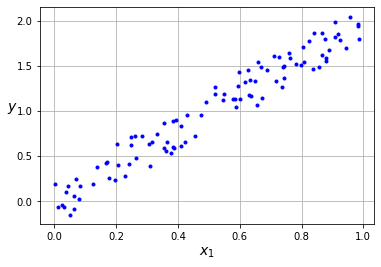

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(100)
X = x.reshape(-1, 1)
y = 2*x + (np.random.rand(100)-0.5)*0.5

plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

Aquí traemos la implementación de nuestro `Perceptrón` para hacer regresión lineal.

In [2]:
def linear(x):
    return x

def mse(y, y_hat):
    return 0.5*np.mean((y_hat - y.reshape(y_hat.shape))**2)

def grad_mse(y, y_hat):
    return y_hat - y.reshape(y_hat.shape)

class Perceptron():
  def __init__(self, inputs, outputs, activation, loss, grad_loss):
    inputs = inputs + 1
    self.w = np.random.normal(loc=0.0, 
          scale = np.sqrt(2/(inputs+outputs)), 
          size = (inputs, outputs)) 
    self.ws = []
    self.activation = activation
    self.loss = loss
    self.grad_loss = grad_loss
    
  def __call__(self, w, x):
    return self.activation(np.dot(x, w)) 

  def fit(self, x, y, epochs, lr, batch_size=None, verbose=True, log_each=1):
    if batch_size == None:
        batch_size = len(x)
    x = np.c_[np.ones(len(x)), x]
    batches = len(x) // batch_size
    for epoch in range(1,epochs+1):
        # Mini-Batch Gradient Descent
        for b in range(batches):
            _x = x[b*batch_size:(b+1)*batch_size]
            _y = y[b*batch_size:(b+1)*batch_size]
            y_hat = self(self.w, _x)  
            #print(y_hat.shape)
            # función de pérdida
            l = self.loss(_y, y_hat)
            # derivadas
            dldh = self.grad_loss(_y, y_hat)
            dhdw = _x
            dldw = np.dot(dhdw.T, dldh)
            # actualizar pesos
            self.w = self.w - lr*dldw
        # guardar pesos para animación
        self.ws.append(self.w.copy())
        # print loss
        if verbose and not epoch % log_each:
            print(f"Epoch {epoch}/{epochs} Loss {l}")
            
  def predict(self, x):
    x = np.c_[np.ones(len(x)), x]
    return self(self.w, x)

class LinearRegression(Perceptron):
  def __init__(self, inputs, outputs=1):
    super().__init__(inputs, outputs, linear, mse, grad_mse)

In [3]:
np.random.seed(42)

model = LinearRegression(inputs=1, outputs=1)
epochs, lr = 50, 0.01
model.fit(x.reshape(len(x),1), y, epochs, lr, log_each=10)

Epoch 10/50 Loss 0.049998690396158126
Epoch 20/50 Loss 0.019875809760024347
Epoch 30/50 Loss 0.012044752591778752
Epoch 40/50 Loss 0.010008909566809587
Epoch 50/50 Loss 0.009479650651535434


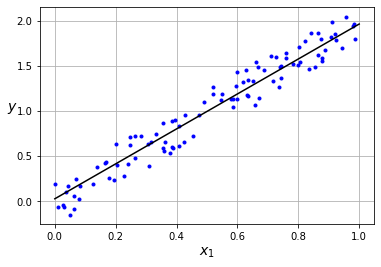

In [4]:
x_new = np.linspace(0, 1, 100)
x_new = x_new.reshape(len(x_new),1)
y_pred = model.predict(x_new)
    
plt.plot(x, y, "b.")
plt.plot(x_new, y_pred, "-k")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

Si nuestros datos siguen una línea recta, el `Perceptrón` será capaz de ajustarse bien. Sin embargo, si probamos lo mismo en unos datos con una distribución cuadrática ...

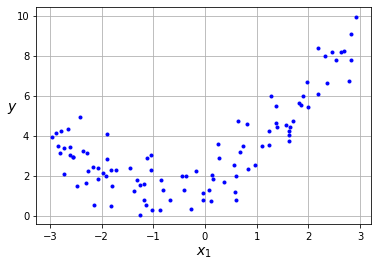

In [5]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

In [38]:
model = LinearRegression(inputs=1, outputs=1)
epochs, lr = 50, 0.001
model.fit(x.reshape(len(x),1), y, epochs, lr, log_each=10)

Epoch 10/50 Loss 2.153726876508713
Epoch 20/50 Loss 1.5791037553651617
Epoch 30/50 Loss 1.5071442500291672
Epoch 40/50 Loss 1.4979679928321092
Epoch 50/50 Loss 1.4967977670759298


In [39]:
from matplotlib import animation, rc
rc('animation', html='html5')

def update(i):
    _x_new = np.linspace(-3, 3, 100)
    x_new = _x_new.reshape(len(_x_new),1)
    x_new = np.c_[np.ones(len(x_new)), x_new]
    w = model.ws[i]
    y_pred = model(w, x_new)
    ax.clear()
    ax.plot(x, y, "b.")
    ax.plot(_x_new, y_pred, "-k")
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$y$", rotation=0, fontsize=14)
    ax.set_title(f"Iteración: {i}")
    ax.grid(True)
    ax.axis([-3,3,0,10])
    return ax

fig = plt.figure(dpi=80)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(model.ws), interval=100)
plt.close()

anim

Lo mejor que nuestro modelo puede hacer es encontrar una línea recta, por lo que fallará cuando esta hipótesis no se cumpla (lo cual ocurre en la mayoría de casos interesantes). En este post vamos a ver como mejorar el `Perceptrón` para resolver este problema.

## El Perceptrón Multicapa

Como ya hemos comentado el `Perceptrón` está inspirado en el funcionamiento de las neuronas biológicos. Sin embargo, nuestros cerebros están formados por trillones (entre 100 y 1000) de conexiones entre neuronas. Así pues, si queremos conseguir modelos más "inteligentes" necesitamos conectar `Perceptrones` en capas consecutivas capaces de representar distribuciones de datos no lineales. Esta arquitectura se conoce con el nombre de `Perceptrón Multicapa`, o *Multilayer Perceptron* en inglés (MLP), y es la arquitectura básica de las `redes neuronales`.

![](https://www.researchgate.net/profile/Mohamed_Zahran6/publication/303875065/figure/fig4/AS:371118507610123@1465492955561/A-hypothetical-example-of-Multilayer-Perceptron-Network.png)

Como puedes ver en la figura, un MLP no es más que una secuencia de `Perceptrones`, las salidas de los cuales son a la vez las entradas para la siguiente capa (así hasta llegar a la salida). En el caso de un MLP de dos capas, podemos calcular la salida de la primera capa como

$$ \mathbf{h}_1 = f_1(\mathbf{w}_1 \cdot \mathbf{x}) $$

donde $\mathbf{h}_1$ es el estado oculto, *hidden state* en inglés, de la primera capa. Como puedes ver la expresión es la misma que la que usamos en el modelo `Perceptrón`, en el que $\mathbf{w}_1$ son los pesos de la primera capa y $\mathbf{x}$ las entradas. Si ahora consideramos $\mathbf{h}_1$ como las entradas de la siguiente capa, podemos encontrar la salida como

$$ \hat{y} = f_2(\mathbf{w}_2 \cdot \mathbf{h}_1) = f_2(\mathbf{w}_2 \cdot f_1(\mathbf{w}_1 \cdot \mathbf{x})) $$

en la que simplemente hemos vuelto a aplicar la misma expresión. Puedes intuir que si tenemos más capas, simplemente repetiremos la expresión para cada capa, usando las salidas de una capa como entradas de la siguiente de manera recurrente hasta llegar a la salida.

## Entrenando un MLP: el algoritmo de *Backpropagation*

Una vez definida la arquitectura del MLP vamos a ver cómo entrenarlo. Para ello vamos a utilizar el mismo algoritmo que ya conocemos para el `Perceptrón`: el algoritmo de `descenso por gradiente`. Primero necesitamos una `función de pérdida`, de la cual calcularemos la derivada con respecto a los pesos del modelo. Para ilustrar el algoritmo vamos a asumir que utilizamos una función de activación de tipo `relu` en la primera capa, $f_1 = max(0, x)$, y una función de activación lineal para la segunda capa ya que estamos interesados en utilizar nuestro MLP para regresión. En cuanto a la función de activación, como ya sabemos para problemas de regresión usamos el error medio cuadrático (MSE).

$$ MSE(\hat{y},y)  = \frac{1}{N} \sum^{N}_{j=1} (\hat{y}^{(j)} - y^{(j)})^2 $$

> ⚡ Utilizamos funciones de activación no lineales en las capas ocultas de un MLP ya que una combinación lineal de funciones lineales sigue siendo una función lineal, lo cual significaría que nuestro MLP no sería mejor que un `Perceptrón` simple. Por ejemplo, en el caso de un MLP con una capa oculta de una sola neurona, una entrada y una salida

$$ \hat{y} = w^1_2 h_1 + w^0_2 = w^1_2 (w^1_1 x_1 + w^0_1) + w^0_2 = w^1 x + w^0 $$

Recordemos el algoritmo de `descenso por gradiente`:

1. Calcular la salida del modelo, $\hat{y}$.
2. Calcular la derivada de la función de pérdida con respecto a los parámetros del modelo, $\frac{\partial MSE}{\partial w}$.
3. Actualizar los parámetros, $w \leftarrow w - \eta \frac{\partial MSE}{\partial w}$, dónde $\eta$ es el *learning rate*.
4. Repetir hasta converger.

En el caso del `Perceptrón` vimos que podemos calcular la derivada de la función de pérdida con respecto a los pesos de la siguiente manera

$$\frac{\partial MSE}{\partial w} = \frac{\partial MSE}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial w} = \frac{2}{N} (\hat{y} - y) x$$

En el caso del MLP, esta expresión sigue siendo válida pero en este caso sólo nos sirve para encontrar la derivada de la función de pérdida con respecto a los pesos de la última capa. Para encontrar la derivada con respecto a los pesos de las capas anteriores tenemos que utilizar el algoritmo de `backpropagation`, que básicamente consiste en aplicar la regla de la cadena de la derivada hacia atrás en el MLP hasta llegar a la primera capa.

$$\frac{\partial MSE}{\partial w_2} = \frac{\partial MSE}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial w_2} = \frac{2}{N} (\hat{y} - y) h_1$$

$$\frac{\partial MSE}{\partial w_1} = \frac{\partial MSE}{\partial h_1} \frac{\partial h_1}{\partial w_1} = \frac{\partial MSE}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial h_1} \frac{\partial h_1}{\partial w_1} = \frac{2}{N} (\hat{y} - y) \mathbf{w}_2 f'_1(\mathbf{w_1} \cdot \mathbf{x}) x$$

Y de nuevo, si tenemos más de dos capas, simplemente repetimos el razonamiento para cada capa hasta llegar a la primera.

> 💡 Los frameworks de `redes neuronales`, como Pytorch o Tensorflow, se van guardando todas las operaciones que tienen lugar en una red neuronal en lo que se llama un `grafo computacional` de manera que cuando queremos derivar cualquier valor con respecto a los pesos de la red simplemente recorremos el grafo hacia atrás aplicando la regla de la cadena, o `backpropagation`. Esto nos permite diseñar arquitecturas de manera arbitraria sin tener que preocuparnos por calcular todas las derivadas de manera manual.

Vamos a implementar este algoritmo en `Python`

In [22]:
def relu(x):
  return np.maximum(0, x)

def reluPrime(x):
  return x > 0

class MLP():
  def __init__(self, D_in, H, D_out):
    self.w1, self.b1 = np.random.normal(loc=0.0,
                                  scale=np.sqrt(2/(D_in+H)),
                                  size=(D_in, H)), np.zeros(H)
    self.w2, self.b2 = np.random.normal(loc=0.0,
                                  scale=np.sqrt(2/(H+D_out)),
                                  size=(H, D_out)), np.zeros(D_out)
    self.ws = []
    self.loss = mse
    self.grad_loss = grad_mse

  def __call__(self, x):
    self.h_pre = np.dot(x, self.w1) + self.b1
    self.h = relu(self.h_pre)
    y_hat = np.dot(self.h, self.w2) + self.b2 
    return y_hat
    
  def fit(self, X, Y, epochs = 100, lr = 0.001, batch_size=None, verbose=True, log_each=1):
    batch_size = len(X) if batch_size == None else batch_size
    batches = len(X) // batch_size
    l = []
    for e in range(1,epochs+1):     
        # Mini-Batch Gradient Descent
        _l = []
        for b in range(batches):
            x = X[b*batch_size:(b+1)*batch_size]
            y = Y[b*batch_size:(b+1)*batch_size]        
            y_pred = self(x) 
            loss = self.loss(y, y_pred)
            _l.append(loss)        
            # Backprop 
            dldy = self.grad_loss(y, y_pred) 
            grad_w2 = np.dot(self.h.T, dldy)
            grad_b2 = dldy.mean(axis=0)
            dldh = np.dot(dldy, self.w2.T)*reluPrime(self.h_pre)      
            grad_w1 = np.dot(x.T, dldh)
            grad_b1 = dldh.mean(axis=0)
            # Update (GD)
            self.w1 = self.w1 - lr * grad_w1
            self.b1 = self.b1 - lr * grad_b1
            self.w2 = self.w2 - lr * grad_w2
            self.b2 = self.b2 - lr * grad_b2
        l.append(np.mean(_l))
        self.ws.append((
            self.w1.copy(),
            self.b1.copy(),
            self.w2.copy(),
            self.b2.copy()
        ))
        if verbose and not e % log_each:
            print(f'Epoch: {e}/{epochs}, Loss: {np.mean(l):.5f}')

  def predict(self, ws, x):
    w1, b1, w2, b2 = ws
    h = relu(np.dot(x, w1) + b1)
    y_hat = np.dot(h, w2) + b2
    return y_hat

In [32]:
model = MLP(D_in=1, H=3, D_out=1)
epochs, lr = 50, 0.0002
model.fit(x, y, epochs, lr, batch_size=1, log_each=10)

Epoch: 10/50, Loss: 4.24354
Epoch: 20/50, Loss: 2.72276
Epoch: 30/50, Loss: 1.97783
Epoch: 40/50, Loss: 1.59322
Epoch: 50/50, Loss: 1.36174


In [33]:
from matplotlib import animation, rc
rc('animation', html='html5')

def update(i):
    _x_new = np.linspace(-3, 3, 100)
    x_new = _x_new.reshape(len(_x_new),1)
    w = model.ws[i]
    y_pred = model.predict(w, x_new)
    ax.clear()
    ax.plot(x, y, "b.")
    ax.plot(_x_new, y_pred, "-k")
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$y$", rotation=0, fontsize=14)
    ax.set_title(f"Iteración: {i}")
    ax.grid(True)
    ax.axis([-3,3,0,10])
    return ax

fig = plt.figure(dpi=80)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(model.ws), interval=100)
plt.close()

anim

Nuestro modelo ahora es capaz de adaptarse mejor a los datos, resolviendo la limitación del `Perceptrón`. Cuantas más capas y neuronas por capas usemos, mejor será capaz el modelo de representar los datos. Esto, sin embargo, puede dar como resultado un problema de `overfitting`, algo de lo que hablaremos con detalle en futuros posts. Puedes explorar en más detalle este modelo, jugando con el número de capas, datos, función de activación, etc, en la siguiente web https://playground.tensorflow.org/

## Resumen

En este post hemos introducido el `Perceptrón Multicapa`, o MLP, la arquitectura más básica de `red neuronal` que combina perceptrones en capas consecutivas. Como hemos visto, si utilizamos funciones de activación no lineales en las capas internas un MLP será capaz de solventar la principal limitación del `Perceptrón`, siendo capaz de adaptarse a datos que no sigan una distribución lineal. Para entrenar un MLP hemos utilizado de nuevo el algoritmo de `descenso por gradiente`, pero en este caso, al tener más de una capa, tenemos que propagar los gradientes desde la salida hasta la primera capa con el algoritmo que se conoce como `backpropagation`. Con todo esto hemos sido capaces de entrenar un MLP para regresión no lineal, y en próximos posts mejoraremos nuestra implementación para ser capaz de llevar a cabo tareas de clasificación incluso cuando no podamos separar las clases con una línea. 